# Assignment 2
## Letter's images prediction
### Federica Fiorentini 807124

In [2]:
#libraries import
import pickle 

import numpy as np

import sklearn
from sklearn.model_selection import train_test_split

from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Input
from keras.layers.core import Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import SGD
#from keras.layers import Input, Dense
#from keras.models import Model

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import pyplot
%matplotlib inline


In [3]:
#file import
x_train = pickle.load(open(r"C:\Users\FedericaFiorentini\Desktop\Università\2Anno\Advanced ML\Esercitazioni\2Assignment\x_train.obj","rb"))
x_test = pickle.load(open(r"C:\Users\FedericaFiorentini\Desktop\Università\2Anno\Advanced ML\Esercitazioni\2Assignment\x_test.obj","rb"))
y_train = pickle.load(open(r"C:\Users\FedericaFiorentini\Desktop\Università\2Anno\Advanced ML\Esercitazioni\2Assignment\y_train.obj","rb"))

### Data exploration and preprocessing

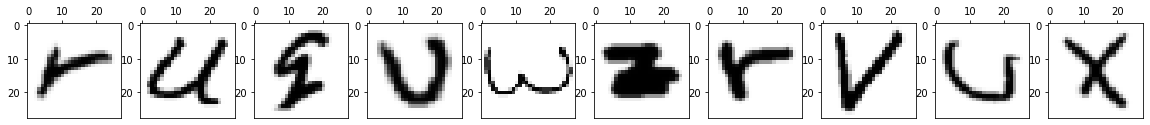

In [4]:
fig = pyplot.figure(figsize = (20,4))
for i in range(0,10):
    ax = fig.add_subplot(1,10,i+1)
    imgplot = ax.imshow(x_train[i], cmap=mpl.cm.Greys)
    imgplot.set_interpolation('nearest')
    ax.xaxis.set_ticks_position('top')
    ax.yaxis.set_ticks_position('left')
pyplot.show()

In [5]:
print('x train dim: ', x_train.shape)
print('x test dim: ', x_test.shape)
print('y train dim: ', y_train.shape)


x train dim:  (14000, 28, 28)
x test dim:  (8800, 28, 28)
y train dim:  (14000,)


In [6]:
np.unique(y_train)

array([16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26], dtype=uint8)

In [7]:
binarizer = sklearn.preprocessing.LabelBinarizer()

n_class = np.unique(y_train)
binarizer.fit(n_class)
y_train_bin = binarizer.transform(y_train)

print(y_train_bin.shape)
print(y_train_bin[5])

(14000, 11)
[0 0 0 0 0 0 0 0 0 0 1]


In [8]:
xx_train = x_train.reshape(14000, 784)
xx_test = x_test.reshape(8800, 784)
xx_train = xx_train.astype("float32")
xx_test = xx_test.astype("float32")

xx_train /= 255
xx_test /= 255

In [9]:
XX_train, XX_val, YY_train, YY_val = train_test_split(xx_train, y_train_bin, test_size=0.1, random_state=0)

In [10]:
print("x train dim: " , XX_train.shape)
print("x val dim: ", XX_val.shape)
print("y train dim: ", YY_train.shape)
print("y val dim: ", YY_val.shape)

x train dim:  (12600, 784)
x val dim:  (1400, 784)
y train dim:  (12600, 11)
y val dim:  (1400, 11)


In [11]:
#plt.imshow(XX_train[3].reshape(28, 28))

### Data modelling

#### Neural Network

In [12]:
n_epochs = 100
batch_size = 100

model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(784,)))
model.add(Dropout(0.5)) #to avoid overfitting
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(11, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               262400    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [14]:
history = model.fit(XX_train, YY_train, epochs = n_epochs, batch_size=batch_size,
                             validation_data=(XX_val, YY_val))


Train on 12600 samples, validate on 1400 samples
Epoch 1/100
12600/12600 [==============================] - 5s 404us/step - loss: 1.3614 - accuracy: 0.5372 - val_loss: 0.5834 - val_accuracy: 0.8229
Epoch 2/100
12600/12600 [==============================] - 4s 350us/step - loss: 0.6810 - accuracy: 0.7933 - val_loss: 0.4304 - val_accuracy: 0.8729
Epoch 3/100
12600/12600 [==============================] - 5s 362us/step - loss: 0.4988 - accuracy: 0.8539 - val_loss: 0.3290 - val_accuracy: 0.9050
Epoch 4/100
12600/12600 [==============================] - 4s 357us/step - loss: 0.4049 - accuracy: 0.8843 - val_loss: 0.3136 - val_accuracy: 0.9114
Epoch 5/100
12600/12600 [==============================] - 5s 360us/step - loss: 0.3562 - accuracy: 0.9002 - val_loss: 0.2826 - val_accuracy: 0.9179
Epoch 6/100
12600/12600 [==============================] - 5s 360us/step - loss: 0.3180 - accuracy: 0.9106 - val_loss: 0.2858 - val_accuracy: 0.9214
Epoch 7/100
12600/12600 [==============================] 

12600/12600 [==============================] - 4s 342us/step - loss: 0.0613 - accuracy: 0.9807 - val_loss: 0.3188 - val_accuracy: 0.9486
Epoch 56/100
12600/12600 [==============================] - 4s 323us/step - loss: 0.0715 - accuracy: 0.9787 - val_loss: 0.2992 - val_accuracy: 0.94860 - accuracy: 0.
Epoch 57/100
12600/12600 [==============================] - 4s 349us/step - loss: 0.0714 - accuracy: 0.9777 - val_loss: 0.2898 - val_accuracy: 0.9479
Epoch 58/100
12600/12600 [==============================] - 4s 341us/step - loss: 0.0583 - accuracy: 0.9823 - val_loss: 0.2968 - val_accuracy: 0.9479
Epoch 59/100
12600/12600 [==============================] - 4s 354us/step - loss: 0.0532 - accuracy: 0.9828 - val_loss: 0.3182 - val_accuracy: 0.9407
Epoch 60/100
12600/12600 [==============================] - 4s 353us/step - loss: 0.0663 - accuracy: 0.9804 - val_loss: 0.3071 - val_accuracy: 0.9429
Epoch 61/100
12600/12600 [==============================] - 4s 342us/step - loss: 0.0625 - accura

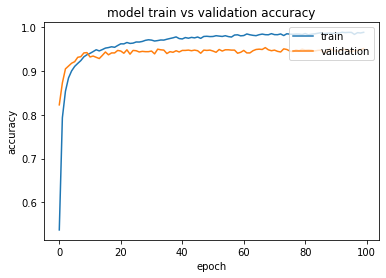

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model train vs validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')

plt.show()

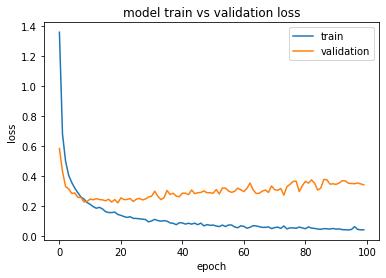

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')

plt.show()

#### Neural Network with early stopping

In [17]:
#early stopping
n_epochs=100
batch_size=100

fBestModel = 'best_model.h5' 
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1) 
best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

history_es = model.fit(XX_train, YY_train, validation_data = (XX_val, YY_val), epochs=n_epochs, 
          batch_size=batch_size, verbose=True, callbacks=[best_model, early_stop]) 

score = model.evaluate(XX_val, YY_val, batch_size=batch_size) #evaluating the models accuracy or loss,
print('validation loss, validation acc:', score)



Train on 12600 samples, validate on 1400 samples
Epoch 1/100
12600/12600 [==============================] - 5s 357us/step - loss: 0.0595 - accuracy: 0.9849 - val_loss: 0.3470 - val_accuracy: 0.9479
Epoch 2/100
12600/12600 [==============================] - 5s 367us/step - loss: 0.0405 - accuracy: 0.9877 - val_loss: 0.3895 - val_accuracy: 0.9464
Epoch 3/100
12600/12600 [==============================] - 5s 360us/step - loss: 0.0492 - accuracy: 0.9870 - val_loss: 0.4036 - val_accuracy: 0.9421
Epoch 4/100
12600/12600 [==============================] - 4s 357us/step - loss: 0.0385 - accuracy: 0.9901 - val_loss: 0.3749 - val_accuracy: 0.9450
Epoch 5/100
12600/12600 [==============================] - 5s 374us/step - loss: 0.0353 - accuracy: 0.9892 - val_loss: 0.4294 - val_accuracy: 0.9464
Epoch 6/100
12600/12600 [==============================] - 5s 391us/step - loss: 0.0362 - accuracy: 0.9890 - val_loss: 0.3830 - val_accuracy: 0.9486
Epoch 7/100
12600/12600 [==============================] 

#### Neural Network with autoencoder

In [18]:
encoding_dim = 32 #numero a piacere

input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [19]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_7 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [20]:
autoencoder.fit(XX_train, XX_train,
                epochs=100,
                batch_size=500,
                shuffle=True,
                validation_data=(XX_val, XX_val))

Train on 12600 samples, validate on 1400 samples
Epoch 1/100
12600/12600 [==============================] - 1s 87us/step - loss: 0.6778 - val_loss: 0.6375
Epoch 2/100
12600/12600 [==============================] - 1s 71us/step - loss: 0.5380 - val_loss: 0.4298
Epoch 3/100
12600/12600 [==============================] - 1s 71us/step - loss: 0.3964 - val_loss: 0.3785
Epoch 4/100
12600/12600 [==============================] - 1s 69us/step - loss: 0.3726 - val_loss: 0.3691
Epoch 5/100
12600/12600 [==============================] - 1s 69us/step - loss: 0.3665 - val_loss: 0.3650
Epoch 6/100
12600/12600 [==============================] - 1s 65us/step - loss: 0.3632 - val_loss: 0.3623
Epoch 7/100
12600/12600 [==============================] - 1s 73us/step - loss: 0.3609 - val_loss: 0.3602
Epoch 8/100
12600/12600 [==============================] - 1s 69us/step - loss: 0.3588 - val_loss: 0.3581
Epoch 9/100
12600/12600 [==============================] - 1s 68us/step - loss: 0.3567 - val_loss: 0.35

12600/12600 [==============================] - 1s 70us/step - loss: 0.2338 - val_loss: 0.2336
Epoch 78/100
12600/12600 [==============================] - 1s 69us/step - loss: 0.2329 - val_loss: 0.2326
Epoch 79/100
12600/12600 [==============================] - 1s 71us/step - loss: 0.2320 - val_loss: 0.2317
Epoch 80/100
12600/12600 [==============================] - 1s 72us/step - loss: 0.2311 - val_loss: 0.2309
Epoch 81/100
12600/12600 [==============================] - 1s 69us/step - loss: 0.2302 - val_loss: 0.2300
Epoch 82/100
12600/12600 [==============================] - 1s 70us/step - loss: 0.2293 - val_loss: 0.2292
Epoch 83/100
12600/12600 [==============================] - 1s 70us/step - loss: 0.2285 - val_loss: 0.2283
Epoch 84/100
12600/12600 [==============================] - 1s 70us/step - loss: 0.2277 - val_loss: 0.2275
Epoch 85/100
12600/12600 [==============================] - 1s 73us/step - loss: 0.2268 - val_loss: 0.2267
Epoch 86/100
12600/12600 [========================

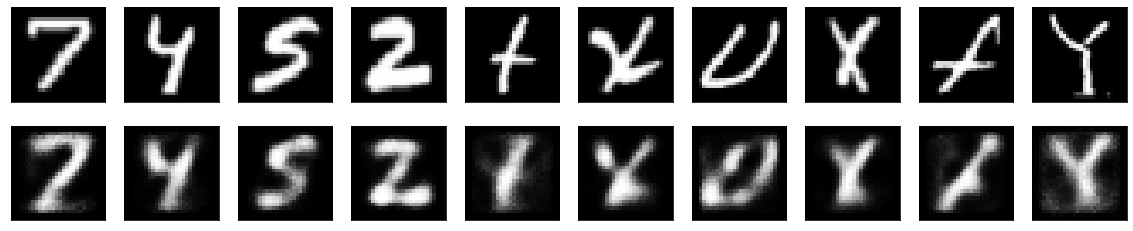

In [21]:
encoded_imgs = encoder.predict(XX_val)
decoded_imgs = decoder.predict(encoded_imgs)

n = 10 
plt.figure(figsize=(20, 4))
for i in range(n):
    # original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(XX_val[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#### The use and evaluation of the encoded representation generated by the auto-encoder to solve the problem of supervised classification.

In [22]:
#applicazione dell'econder al train e al val
XX_train_enc = encoder.predict(XX_train) 
XX_val_enc = encoder.predict(XX_val)

In [23]:
n_epochs = 100
batch_size = 100

model2 = Sequential()
model2.add(Dense(1024, activation='relu', input_shape=(32,)))
model2.add(Dropout(0.5)) #to avoid overfitting
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(11, activation='softmax'))

model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
history_model2 = model2.fit(XX_train_enc, YY_train, validation_data = (XX_val_enc, YY_val), epochs=n_epochs, 
          batch_size=batch_size, verbose=True, callbacks=[best_model, early_stop]) 

score2 = model2.evaluate(XX_val_enc, YY_val, batch_size=batch_size) #evaluating the models accuracy or loss,
print('validation loss, validation acc:', score)

Train on 12600 samples, validate on 1400 samples
Epoch 1/100
12600/12600 [==============================] - 3s 238us/step - loss: 2.0251 - accuracy: 0.2994 - val_loss: 1.2861 - val_accuracy: 0.6186
Epoch 2/100
12600/12600 [==============================] - 2s 195us/step - loss: 1.2601 - accuracy: 0.5784 - val_loss: 0.7519 - val_accuracy: 0.7586
Epoch 3/100
12600/12600 [==============================] - 3s 213us/step - loss: 0.9164 - accuracy: 0.7124 - val_loss: 0.6091 - val_accuracy: 0.8236
Epoch 4/100
12600/12600 [==============================] - 2s 190us/step - loss: 0.7650 - accuracy: 0.7679 - val_loss: 0.4716 - val_accuracy: 0.8564
Epoch 5/100
12600/12600 [==============================] - 2s 189us/step - loss: 0.6761 - accuracy: 0.7915 - val_loss: 0.4598 - val_accuracy: 0.8543
Epoch 6/100
12600/12600 [==============================] - 2s 191us/step - loss: 0.6119 - accuracy: 0.8173 - val_loss: 0.4078 - val_accuracy: 0.8750
Epoch 7/100
12600/12600 [==============================] 

In [25]:
print('Accuracy validation: ', score[1])
print('Accuracy validation with autoencoder', score2[1])

Accuracy validation:  0.9471428394317627
Accuracy validation with autoencoder 0.925000011920929


In [26]:
x_test_encoder = encoder.predict(xx_test) 
class_y_test = model2.predict_classes(x_test_encoder)

y_test = class_y_test + 16

array([16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26], dtype=int64)

In [29]:
np.savetxt(r'C:\Users\FedericaFiorentini\Desktop\Università\2Anno\Advanced ML\Esercitazioni\2Assignment\Federica_Fiorentini_807124_score2.txt', y_test, fmt='%d')